In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('concrete_data.csv')

In [3]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# given everything in the dataset is a continious feature we don't need to do any encoding
# we can just split the data into training and testing sets
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Feature Engineering

In [5]:
"""
!Feature Engineering
From what I see, It'll be greatto have a column that is a sum of the features, not including age

Let's convert everything into percent values, given the assumption that the items in the columns are 
the only things that make up the concrete, we can assume that the sum of the columns is 100% of the concrete
"""
# sum =data.iloc[:, 0:6].sum(axis=1) 
# for c_index in range(7):
#     data.iloc[:, c_index] = (data.iloc[:, c_index] / sum) * 100
    
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
"""Honestly, that seems about all the engineering that we have to do.
Thus, let's work on the model

Now, we have to turn everything into a tensor, by first stacking into the right shape, shuffling, and then splitting
"""
import torch

y = data.iloc[:, 8]
cont = data.iloc[:, :8]
y, cont


(0       79.99
 1       61.89
 2       40.27
 3       41.05
 4       44.30
         ...  
 1025    44.28
 1026    31.18
 1027    23.70
 1028    32.77
 1029    32.40
 Name: concrete_compressive_strength, Length: 1030, dtype: float64,
       cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
 0      540.0                 0.0      0.0  162.0               2.5   
 1      540.0                 0.0      0.0  162.0               2.5   
 2      332.5               142.5      0.0  228.0               0.0   
 3      332.5               142.5      0.0  228.0               0.0   
 4      198.6               132.4      0.0  192.0               0.0   
 ...      ...                 ...      ...    ...               ...   
 1025   276.4               116.0     90.3  179.6               8.9   
 1026   322.2                 0.0    115.6  196.0              10.4   
 1027   148.5               139.4    108.6  192.7               6.1   
 1028   159.1               186.7      0.0  175.6        

In [7]:

cont = torch.tensor(np.stack([cont[col].values for col in cont.columns], 1), dtype = torch.float32) # for wierd sizing
y = torch.tensor(np.stack([y], 1), dtype = torch.float32)  

In [8]:
cont.shape

torch.Size([1030, 8])

In [9]:

cont

tensor([[ 540.0000,    0.0000,    0.0000,  ..., 1040.0000,  676.0000,
           28.0000],
        [ 540.0000,    0.0000,    0.0000,  ..., 1055.0000,  676.0000,
           28.0000],
        [ 332.5000,  142.5000,    0.0000,  ...,  932.0000,  594.0000,
          270.0000],
        ...,
        [ 148.5000,  139.4000,  108.6000,  ...,  892.4000,  780.0000,
           28.0000],
        [ 159.1000,  186.7000,    0.0000,  ...,  989.6000,  788.9000,
           28.0000],
        [ 260.9000,  100.5000,   78.3000,  ...,  864.5000,  761.5000,
           28.0000]])

In [10]:
from torch import nn

class CementModel(nn.Module):
    def __init__(self, layers, dropout=0.25, in_szes = 8, out_sz = 1):
        super().__init__()
        layer_list = [] #don't immediately add the stuff to the item, just append it to the list
        #allows for variable layers
        self.bn = nn.BatchNorm1d(in_szes);
        i = in_szes #
        for layer in layers:
            layer_list.append(nn.Linear(i, layer))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(layer))
            layer_list.append(nn.Dropout(dropout))
            i = layer
        layer_list.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layer_list) # unpacks the list into the neural network
    def forward(self, x):
        x = self.bn(x)
        return self.layers(x)

In [11]:
model = CementModel([100, 256, 256,512,1024, 512, 256, 256, 50, 25, 10, 5, 2])

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
data.shape

(1030, 9)

In [14]:
# let's have the testing data from the max
import math
batch_size = math.floor(data.shape[0] * .8) # ! unorthodox definition of a "batch size"
test_size = int(batch_size * 0.2)


In [15]:
batch_size, test_size

(824, 164)

In [16]:
train = cont[:batch_size]
train_y = y[:batch_size]
test = cont[batch_size:]
test_y = y[batch_size:]

In [17]:
train.shape

torch.Size([824, 8])

In [18]:
train[:5]

tensor([[ 540.0000,    0.0000,    0.0000,  162.0000,    2.5000, 1040.0000,
          676.0000,   28.0000],
        [ 540.0000,    0.0000,    0.0000,  162.0000,    2.5000, 1055.0000,
          676.0000,   28.0000],
        [ 332.5000,  142.5000,    0.0000,  228.0000,    0.0000,  932.0000,
          594.0000,  270.0000],
        [ 332.5000,  142.5000,    0.0000,  228.0000,    0.0000,  932.0000,
          594.0000,  365.0000],
        [ 198.6000,  132.4000,    0.0000,  192.0000,    0.0000,  978.4000,
          825.5000,  360.0000]])

In [19]:
train_y[:5]

tensor([[79.9900],
        [61.8900],
        [40.2700],
        [41.0500],
        [44.3000]])

In [20]:
import time

start = time.time()
n_epochs = 2500 
losses = []
for epoch in range(n_epochs):
    y_pred = model(train)
    loss = criterion(y_pred, train_y)
    losses.append(loss.detach().numpy())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss {loss:.8f}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

end = time.time()

print("Duration: --- %s seconds ---" % (end - start))

Epoch 0: loss 1690.86633301
Epoch 100: loss 1654.19616699
Epoch 200: loss 1619.21520996
Epoch 300: loss 1578.57788086
Epoch 400: loss 1520.19812012
Epoch 500: loss 1468.49511719
Epoch 600: loss 1406.51049805
Epoch 700: loss 1353.21301270
Epoch 800: loss 1268.35205078
Epoch 900: loss 1219.65051270
Epoch 1000: loss 1140.14196777
Epoch 1100: loss 1067.37988281
Epoch 1200: loss 1010.64636230
Epoch 1300: loss 935.72082520
Epoch 1400: loss 867.43865967
Epoch 1500: loss 823.96862793
Epoch 1600: loss 744.57824707
Epoch 1700: loss 703.48406982
Epoch 1800: loss 669.90338135
Epoch 1900: loss 616.68170166
Duration: --- 79.40342688560486 seconds ---


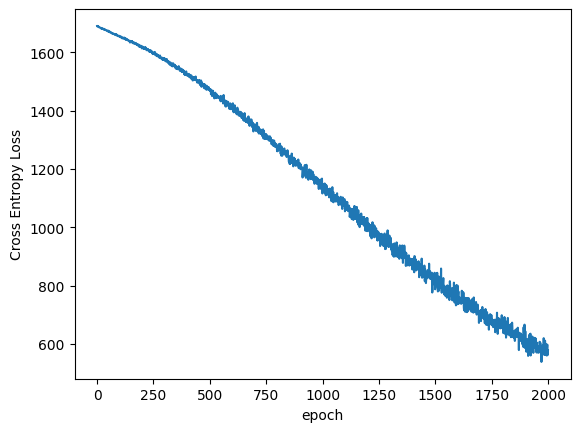

In [21]:
from matplotlib import pyplot as plt
plt.plot(range(n_epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [22]:
with torch.no_grad():
    y_val = model(test)
    loss = criterion(y_val, test_y)
print(f'{loss:.8f}')

602.41284180
